# Lesson 8: Object Detection

- In the classroom, the libraries are already installed for you.
- If you would like to run this code on your own machine, you can install the following:

```
    !pip install transformers
    !pip install gradio
    !pip install timm
    !pip install inflect
    !pip install phonemizer
```

**Note:**  `py-espeak-ng` is only available Linux operating systems.

To run locally in a Linux machine, follow these commands:
```
    sudo apt-get update
    sudo apt-get install espeak-ng
    pip install py-espeak-ng
```

### Build the `object-detection` pipeline using 🤗 Transformers Library

- This model was release with the paper [End-to-End Object Detection with Transformers](https://arxiv.org/abs/2005.12872) from Carion et al. (2020)

In [2]:
from helperL8 import load_image_from_url, render_results_in_image

In [3]:
from transformers import pipeline

2024-09-06 08:15:05.521544: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-06 08:15:05.547223: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-06 08:15:05.547250: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-06 08:15:05.547895: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-06 08:15:05.552393: I tensorflow/core/platform/cpu_feature_guar

- Here is some code that suppresses warning messages.

In [4]:
from transformers.utils import logging
logging.set_verbosity_error()

from helperL8 import ignore_warnings
ignore_warnings()

In [5]:
od_pipe = pipeline("object-detection", "facebook/detr-resnet-50")

config.json:   0%|          | 0.00/4.59k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/290 [00:00<?, ?B/s]

Info about [facebook/detr-resnet-50](https://huggingface.co/facebook/detr-resnet-50)

Explore more of the [Hugging Face Hub for more object detection models](https://huggingface.co/models?pipeline_tag=object-detection&sort=trending)

### Use the Pipeline

In [6]:
from PIL import Image

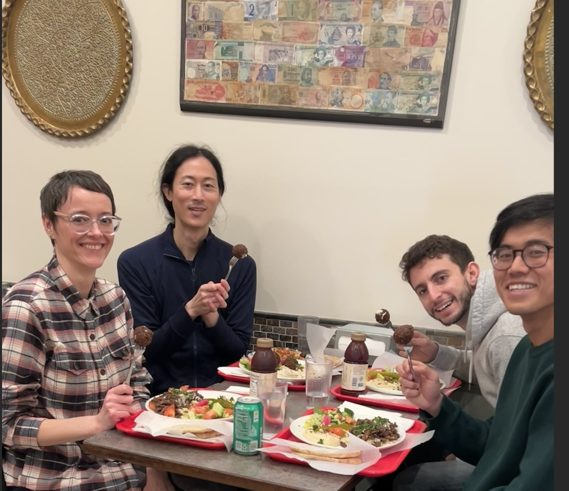

In [7]:
raw_image = Image.open('images/huggingface_friends.jpg')
raw_image.resize((569, 491))

In [8]:
pipeline_output = od_pipe(raw_image)

In [9]:
pipeline_output

[{'score': 0.5531008839607239,
  'label': 'bowl',
  'box': {'xmin': 286, 'ymin': 783, 'xmax': 501, 'ymax': 875}},
 {'score': 0.5437560081481934,
  'label': 'fork',
  'box': {'xmin': 439, 'ymin': 496, 'xmax': 488, 'ymax': 569}},
 {'score': 0.98568195104599,
  'label': 'fork',
  'box': {'xmin': 808, 'ymin': 688, 'xmax': 836, 'ymax': 765}},
 {'score': 0.9904230833053589,
  'label': 'bottle',
  'box': {'xmin': 688, 'ymin': 667, 'xmax': 743, 'ymax': 789}},
 {'score': 0.9948464632034302,
  'label': 'cup',
  'box': {'xmin': 520, 'ymin': 770, 'xmax': 577, 'ymax': 863}},
 {'score': 0.9971936941146851,
  'label': 'person',
  'box': {'xmin': 778, 'ymin': 387, 'xmax': 1125, 'ymax': 972}},
 {'score': 0.5112560987472534,
  'label': 'cup',
  'box': {'xmin': 498, 'ymin': 681, 'xmax': 553, 'ymax': 733}},
 {'score': 0.9695368409156799,
  'label': 'bottle',
  'box': {'xmin': 465, 'ymin': 786, 'xmax': 527, 'ymax': 912}},
 {'score': 0.9300821423530579,
  'label': 'bowl',
  'box': {'xmin': 556, 'ymin': 739,

- Return the results from the pipeline using the helper function `render_results_in_image`.

In [10]:
processed_image = render_results_in_image(
    raw_image, 
    pipeline_output)

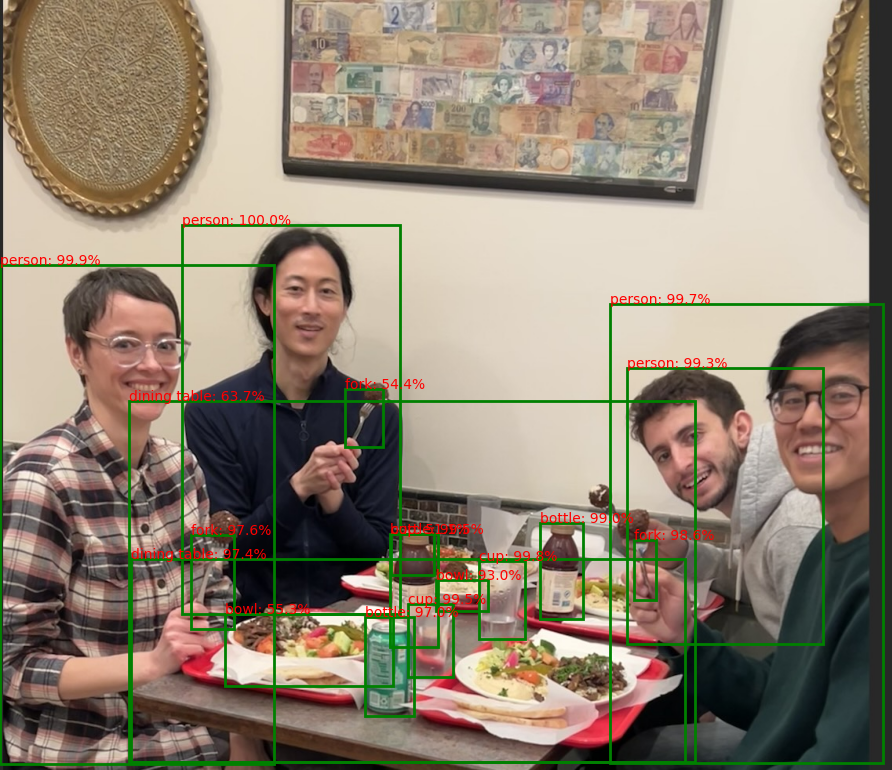

In [11]:
processed_image

### Using `Gradio` as a Simple Interface

- Use [Gradio](https://www.gradio.app) to create a demo for the object detection app.
- The demo makes it look friendly and easy to use.
- You can share the demo with your friends and colleagues as well.

In [12]:
import os
import gradio as gr

In [13]:
def get_pipeline_prediction(pil_image):
    
    pipeline_output = od_pipe(pil_image)
    
    processed_image = render_results_in_image(pil_image,
                                            pipeline_output)
    return processed_image

In [14]:
demo = gr.Interface(
  fn=get_pipeline_prediction,
  inputs=gr.Image(label="Input image", 
                  type="pil"),
  outputs=gr.Image(label="Output image with predicted instances",
                   type="pil")
)

- `share=True` will provide an online link to access to the demo

In [15]:
demo.launch(share=True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://cd27a97db9a79df5ac.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [16]:
demo.close()

Closing server running on port: 7860


### Close the app
- Remember to call `.close()` on the Gradio app when you're done using it.

### Make an AI Powered Audio Assistant

- Combine the object detector with a text-to-speech model that will help dictate what is inside the image.

- Inspect the output of the object detection pipeline.

In [17]:
pipeline_output

[{'score': 0.5531008839607239,
  'label': 'bowl',
  'box': {'xmin': 286, 'ymin': 783, 'xmax': 501, 'ymax': 875}},
 {'score': 0.5437560081481934,
  'label': 'fork',
  'box': {'xmin': 439, 'ymin': 496, 'xmax': 488, 'ymax': 569}},
 {'score': 0.98568195104599,
  'label': 'fork',
  'box': {'xmin': 808, 'ymin': 688, 'xmax': 836, 'ymax': 765}},
 {'score': 0.9904230833053589,
  'label': 'bottle',
  'box': {'xmin': 688, 'ymin': 667, 'xmax': 743, 'ymax': 789}},
 {'score': 0.9948464632034302,
  'label': 'cup',
  'box': {'xmin': 520, 'ymin': 770, 'xmax': 577, 'ymax': 863}},
 {'score': 0.9971936941146851,
  'label': 'person',
  'box': {'xmin': 778, 'ymin': 387, 'xmax': 1125, 'ymax': 972}},
 {'score': 0.5112560987472534,
  'label': 'cup',
  'box': {'xmin': 498, 'ymin': 681, 'xmax': 553, 'ymax': 733}},
 {'score': 0.9695368409156799,
  'label': 'bottle',
  'box': {'xmin': 465, 'ymin': 786, 'xmax': 527, 'ymax': 912}},
 {'score': 0.9300821423530579,
  'label': 'bowl',
  'box': {'xmin': 556, 'ymin': 739,

In [18]:
od_pipe

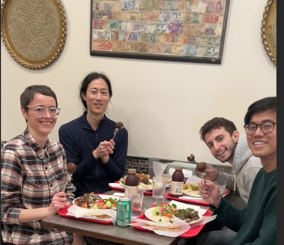

In [19]:
raw_image = Image.open('images/huggingface_friends.jpg')
raw_image.resize((284, 245))

In [20]:
from helperL8 import summarize_predictions_natural_language

In [21]:
text = summarize_predictions_natural_language(pipeline_output)

In [22]:
text

'In this image, there are two bowls three forks three bottles three cups four persons and two dining tables.'

### Generate Audio Narration of an Image

In [23]:
tts_pipe = pipeline("text-to-speech",
                    model="kakao-enterprise/vits-ljs")

More info about [kakao-enterprise/vits-ljs](https://huggingface.co/kakao-enterprise/vits-ljs).

In [24]:
narrated_text = tts_pipe(text)

### Play the Generated Audio

In [25]:
from IPython.display import Audio as IPythonAudio

In [26]:
IPythonAudio(narrated_text["audio"][0],
             rate=narrated_text["sampling_rate"])

### Try it yourself! 
- Try these models with other images!